<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Евгений! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

# Поиск по изображениям

Вы работаете в фотохостинге для профессиональных фотографов «Со Смыслом» (“With Sense”).
Ваши пользователи размещают свои фотографии на хостинге и сопровождают их полным описанием: указывают место съёмок, модель камеры и т. д. Отличительная особенность сервиса — описание: его может предоставить не только тот, кто размещает фотографию, но и другие пользователи портала.  

Ваш отдел занимается экспериментом по разработке поиска референсных фотографий для фотографов. Суть поиска заключается в следующем: пользователь сервиса вводит описание нужной сцены. Например, такое:
⎢ A man is crossing a mountain pass on a metal bridge.

Чтобы эксперимент получил право на жизнь, нужно защитить его перед руководителем компании. Для защиты необходимо презентовать так называемый PoC (Proof of Concept, Проверка концепции) — продемонстрировать, что такой проект практически осуществим. Вам поручено разработать демонстрационную версию поиска изображений по запросу.

In [197]:
pip install -U sentence_transformers 

     ---------------------------------------- 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 1.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e2bf5f5432b4b291f1edce41e8fc86125300e7999483645ae9d86f012d8a01fa
  Stored in directory: c:\users\evgeniy\appdata\local\pip\cache\wheels\0a\f5\dd\9d00836c4e9e279c2a59d5b0ab72dafa66cbc626a327c550dd
Successfully built sentence_transformers
Note: you may need to restart the kernel to use updated packages.


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import re
import os
from os import listdir
from os.path import isfile, join
import nltk
import winsound
from tqdm import tqdm
from PIL import Image
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50
from sentence_transformers import SentenceTransformer, util

In [3]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\evgeniy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evgeniy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\evgeniy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Исследовательский анализ

Загрузим все данные, что у нас есть

In [4]:
crowd_annot = pd.read_csv('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/CrowdAnnotations.tsv', sep='\t', header=None)
expert_annot = pd.read_csv('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/ExpertAnnotations.tsv', sep='\t', header=None)
train_data = pd.read_csv('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/train_dataset.csv')
test_queries = pd.read_csv('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_queries.csv', sep='|', usecols=[1, 2, 3])
test_images = pd.read_csv('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_images.csv')

all_docs = {'crowd_annot': crowd_annot,
            'expert_annot': expert_annot,
            'train_data': train_data,
            'test_queries': test_queries,
            'test_images': test_images}

Посмотрим на содержание

In [5]:
for doc in all_docs:
    print(doc)
    print(all_docs[doc].head(2))
    print(all_docs[doc].info())
    print('-----------------------------------------------------------------------------')

crowd_annot
                           0                            1    2  3  4
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2  1.0  3  0
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2  0.0  0  3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47830 non-null  object 
 1   1       47830 non-null  object 
 2   2       47830 non-null  float64
 3   3       47830 non-null  int64  
 4   4       47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB
None
-----------------------------------------------------------------------------
expert_annot
                           0                            1  2  3  4
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2  1  1  1
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2  1  1  2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Хорошо, что ты явно исследовал все датафреймы (хоть информация и выведена в цикле без каких либо выводов). 


</div>

Переименуем столбцы в crowd_annot и expert_annot, чтобы они несли смысл.

In [6]:
crowd_annot = crowd_annot.rename(columns={0: "image", 1: 'query_id', 2: 'aprove_share', 3: 'aprove_num', 4: 'reject_num'})
expert_annot = expert_annot.rename(columns={0: "image", 1: 'query_id', 2: '1_exp', 3: '2_exp', 4: '3_exp'})

Соединим оценки экспертов и комьюнити

In [7]:
crowd_and_expert = crowd_annot.merge(expert_annot, on=['image', 'query_id'], how='left')
crowd_and_expert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47830 entries, 0 to 47829
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         47830 non-null  object 
 1   query_id      47830 non-null  object 
 2   aprove_share  47830 non-null  float64
 3   aprove_num    47830 non-null  int64  
 4   reject_num    47830 non-null  int64  
 5   1_exp         2329 non-null   float64
 6   2_exp         2329 non-null   float64
 7   3_exp         2329 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 3.3+ MB


Я соединял по двум столбацм: имя изображения и описание, и получились, тчо только в 2329 случаях значения в этих столбцах совпали. Теперь нам надо понять, а где же лишние описания и изображения.
Соеденим теперь поочередно эти таблицы с таблицей train_data.

In [8]:
expert_and_train = expert_annot.merge(train_data, on=['image', 'query_id'], how='left')
expert_and_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   1_exp       5822 non-null   int64 
 3   2_exp       5822 non-null   int64 
 4   3_exp       5822 non-null   int64 
 5   query_text  5822 non-null   object
dtypes: int64(3), object(3)
memory usage: 318.4+ KB


In [9]:
crowd_and_train = crowd_annot.merge(train_data, on=['image', 'query_id'], how='left')
crowd_and_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47830 entries, 0 to 47829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         47830 non-null  object 
 1   query_id      47830 non-null  object 
 2   aprove_share  47830 non-null  float64
 3   aprove_num    47830 non-null  int64  
 4   reject_num    47830 non-null  int64  
 5   query_text    2329 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.6+ MB


Оценки экспертов 1:1 соединились с `train_data`, а вот оценки комьюнити совпали с `train_data` все в тех же 2329 строках.
Еще посмотрим, что будет. если соединить оценки комьюнити с `train_data` только по полю `image`

In [10]:
half_crowd_and_train = crowd_annot.merge(train_data, on=['image'], how='left')
half_crowd_and_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277460 entries, 0 to 277459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   image         277460 non-null  object 
 1   query_id_x    277460 non-null  object 
 2   aprove_share  277460 non-null  float64
 3   aprove_num    277460 non-null  int64  
 4   reject_num    277460 non-null  int64  
 5   query_id_y    277460 non-null  object 
 6   query_text    277460 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 16.9+ MB


Т.е. можно сделать вывод, что картинки в `crowd_annot` и `train_data` исмользуются одни и те же. Ещё посмотрим, а сколько всего уникальных изображений.

In [11]:
print('уникальных изображений в train_data: ', len(train_data['image'].unique()))
print('уникальных изображений в expert_annot: ', len(expert_annot['image'].unique()))
print('уникальных изображений в crowd_annot: ', len(crowd_annot['image'].unique()))

уникальных изображений в train_data:  1000
уникальных изображений в expert_annot:  1000
уникальных изображений в crowd_annot:  1000


Итого мы имеем, что во всех 3 фалах одинаковое количество изображений. Пары изображения+описание одинаковые в `expert_annot` `tarin_data`, но в файле `crowd_annot` есть не все пары из `tarin_data`, а так же множество своих уникальных пар. Вопрос: нужны ли нам эти дополнительные описания из `crowd_annot`? Наверное нет, потому что у нас есть только query_id этих описаний и нет самих текстов.

Я соединяю 3 файла, так чтобы у нас были и тексты и оценки из всех источников.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
 То, что в датафрейме с краудсорс оценками есть query_id вполне достаточно, чтобы восстановить сам текст запроса. 
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом разделе у тебя смешалось EDA и начало подготовки данных. Рекомендую не путать читателя и сделать явный EDA (с выводами в конце), а всё что касается подготовки данных выделять в отдельный раздел.
    
</div>

In [12]:
train_data_annot = train_data.merge(crowd_annot, on=['image', 'query_id'], how='left').merge(expert_annot, on=['image', 'query_id'], how='left')
print(train_data_annot.info())
train_data_annot.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         5822 non-null   object 
 1   query_id      5822 non-null   object 
 2   query_text    5822 non-null   object 
 3   aprove_share  2329 non-null   float64
 4   aprove_num    2329 non-null   float64
 5   reject_num    2329 non-null   float64
 6   1_exp         5822 non-null   int64  
 7   2_exp         5822 non-null   int64  
 8   3_exp         5822 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 454.8+ KB
None


image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  aprove_share  \
0  A young child is wearing blue goggles and sitt...           0.0   
1  A young child is wearing blue goggles and sitt...           NaN   
2  A young child is wearing blue goggles and sitt...           0.0   
3  A young child is wearing blue goggles and sitt...           1.0   
4  A young child is wearing blue goggles and sitt...           NaN   

   aprove_num  reject_num  1_exp  2_exp  3_exp  
0         0.0         3.0      1      1      1  
1         NaN         NaN      1      1      1  
2         0.0         3.0      1      2      2  
3         3.0         0.0      4      4      4  
4         NaN         NaN      1      1      1

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не  нужно оборачивать в print() результат вывода метода .info(). Этот метод сам печатает информацию, но возвращает None, который ты и выводишь на печать
    
</div>

Теперь нам нужна одна единая оценка. Предлагается следующая модель:
1. Будем переводить оценку в шкалу от 0 до 1
2. Оценки экспертов будут приобразованы по принципу: 1 = 0; 2 = 0.3; 3 = 0,6 и 4 = 0,9. 
3. Оценки комьюнити уже и так в шкале от 0 до 1
4. Будем считать, что голос эксперта в 2 раза весомее голоса члена комьюнити.
5. Общая формула соотвестсивия описания такая: (оценка комьюнити) * (число оценщиков в комьюнити/(число оценщиков в комьюнити + 6)) + (средняя оценка экспертов) * (6/(6+число оценщиков в комьюнити))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Стоит оценки экспертов тоже переводить в шкалу 0-1, а не 0-0.9. Можно применить линейное преобразование x -> (x -1) /3
    
</div>

Для начала заменил NaN на 0, при такой замене наша средняя взвешенная оценка не должна пострадать

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Вот здесь ты ошибаешься. Отсутствие оценки со стороны краудсорса ты толкуешь как оценка несоответствия. Логчнее было бы при отсутствии краудсорс оценки не производить усреднение а оставить оценку экспертов.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Тут не соглашусь. Поскольку при замене нулями и количесвто оценьщиков комьюнити тоже = 0, значит вся средневзвешенная оценка строится исключительно на оценке экспетов. Например, 0*(0/6) + 0.9*(6/(6+0)) = 0.9 = изначальной оценке экспертов.
</div> 

In [13]:
train_data_annot = train_data_annot.fillna(value=0)

Затем заменим оценки экспертов согласну пункту 2 плана описанного выше

In [14]:
train_data_annot = train_data_annot.replace({
    '1_exp': {1: 0, 2: 0.3, 3: 0.6, 4: 0.9},
    '2_exp': {1: 0, 2: 0.3, 3: 0.6, 4: 0.9},
    '3_exp': {1: 0, 2: 0.3, 3: 0.6, 4: 0.9}})

In [15]:
train_data_annot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         5822 non-null   object 
 1   query_id      5822 non-null   object 
 2   query_text    5822 non-null   object 
 3   aprove_share  5822 non-null   float64
 4   aprove_num    5822 non-null   float64
 5   reject_num    5822 non-null   float64
 6   1_exp         5822 non-null   float64
 7   2_exp         5822 non-null   float64
 8   3_exp         5822 non-null   float64
dtypes: float64(6), object(3)
memory usage: 454.8+ KB


In [16]:
def weighted_average(row):
    w_a = (row['aprove_share']*((row['aprove_num']+row['reject_num'])/(row['aprove_num']+row['reject_num']+6))
     + statistics.mean([row['1_exp'], row['1_exp'], row['1_exp']])*(6/(row['aprove_num']+row['reject_num']+6)))
    return w_a

In [17]:
train_data_annot['w_a'] = train_data_annot.apply(weighted_average, axis=1)

Теперь у нас есть средневзвешанные оценки по соответсвию изображений и описаний всех 5822 строк из `train_data`

In [18]:
train_data_annot.sample(10)

image                     query_id  \
2415  1467533293_a2656cc000.jpg  2182488373_df73c7cc09.jpg#2   
5629  3106026005_473a7b1c8c.jpg  3201427741_3033f5b625.jpg#2   
3906  2933637854_984614e18b.jpg   732468337_a37075225e.jpg#2   
3179  3074842262_62b1b2168c.jpg   463978865_c87c6ca84c.jpg#2   
5080   401079494_562454c4d6.jpg  1679617928_a73c1769be.jpg#2   
2311   143688283_a96ded20f1.jpg  2991575785_bd4868e215.jpg#2   
3223  1836335410_de8313a64e.jpg  2610447973_89227ff978.jpg#2   
738   1224851143_33bcdd299c.jpg  2083434441_a93bc6306b.jpg#2   
700   3214237686_6566b8b52f.jpg  2999730677_0cfa1c146e.jpg#2   
2465  2796801478_8ebd7e550b.jpg   132489044_3be606baf7.jpg#2   

                                             query_text  aprove_share  \
2415  People are standing on the Hollywood walk of f...           0.0   
5629  A woman in a headdress is holding a little boy...           0.0   
3906  A naked baby and toddler smear each other in p...           0.0   
3179  A man with dreadlocks and a backpack walks dow...           0.0   
5080  A dog , lying down , tethered to the side mirr...           0.0   
2311  A girl in jeans tries to show an adult how hig...           0.0   
3223  Two people are sitting next to a wood-stacked ...           0.0   
738   An older woman with blond hair rides a bicycle...           0.0   
700             Two puppies are playing in the leaves .           0.0   
2465    An asian man in a suit on the subway , asleep .           0.0   

      aprove_num  reject_num  1_exp  2_exp  3_exp  w_a  
2415         0.0         0.0    0.0    0.0    0.0  0.0  
5629         0.0         3.0    0.0    0.0    0.0  0.0  
3906         0.0         3.0    0.0    0.0    0.0  0.0  
3179         0.0         0.0    0.0    0.0    0.3  0.0  
5080         0.0         0.0    0.0    0.0    0.3  0.0  
2311         0.0         3.0    0.0    0.0    0.0  0.0  
3223         0.0         0.0    0.0    0.0    0.3  0.0  
738          0.0         0.0    0.0    0.0    0.0  0.0  
700          0.0         0.0    0.0    0.0    0.3  0.0  
2465         0.0         0.0    0.0    0.0    0.3  0.0

Под конец анализа удостоверимся, что изображения в 2 тестовых таблицах соотвествуют друг другу.

In [19]:
test_dfs = test_queries.merge(test_images, on='image', how='inner')
test_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


Да, убедились, что все ок.

## Подготовка данных

Нам необходимо исключить из тренировочнызх данных описания, которые могут попадать под юридические ограничения. Создадим список слов.

In [20]:
baned_words = ['kid ', ' kid' 'little boy', 'little girl', 'young boy', 'young girl', 'child ', ' child', ' teenager', 'teenager ', 'baby ', ' baby', 'boy']

Напишем функцию, которая добавит признак, если в тексте описания есть запрещенные слова

In [21]:
def func_baned_words(row):
    count = 0
    for word in baned_words:
        text = row['query_text'].lower()
        if word in text:
            count += 1
    if count > 0:
        return 1
    else:
        return 0


In [22]:
train_data_annot['baned'] = train_data_annot.apply(func_baned_words, axis=1)

In [23]:
train_data_annot[train_data_annot['baned']==1]

image                     query_id  \
0     1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1     1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2     2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3     2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4     2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
...                         ...                          ...   
5797   391579205_c8373b5411.jpg   909191414_1cf5d85821.jpg#2   
5803   444481722_690d0cadcf.jpg  1352410176_af6b139734.jpg#2   
5804   488408004_a1e26d4886.jpg  1352410176_af6b139734.jpg#2   
5814   751109943_2a7f8e117f.jpg  2475162978_2c51048dca.jpg#2   
5817   757046028_ff5999f91b.jpg  2061144717_5b3a1864f0.jpg#2   

                                             query_text  aprove_share  \
0     A young child is wearing blue goggles and sitt...      0.000000   
1     A young child is wearing blue goggles and sitt...      0.000000   
2     A young child is wearing blue goggles and sitt...      0.000000   
3     A young child is wearing blue goggles and sitt...      1.000000   
4     A young child is wearing blue goggles and sitt...      0.000000   
...                                                 ...           ...   
5797  A young boy jumping in front of a young girl a...      0.000000   
5803  A young girl balances on wooden pylons at the ...      0.000000   
5804  A young girl balances on wooden pylons at the ...      0.000000   
5814  a woman holding a small ball chasing after a s...      0.000000   
5817         A man in an ampitheater talking to a boy .      0.333333   

      aprove_num  reject_num  1_exp  2_exp  3_exp       w_a  baned  
0            0.0         3.0    0.0    0.0    0.0  0.000000      1  
1            0.0         0.0    0.0    0.0    0.0  0.000000      1  
2            0.0         3.0    0.0    0.3    0.3  0.000000      1  
3            3.0         0.0    0.9    0.9    0.9  0.933333      1  
4            0.0         0.0    0.0    0.0    0.0  0.000000      1  
...          ...         ...    ...    ...    ...       ...    ...  
5797         0.0         3.0    0.0    0.0    0.6  0.000000      1  
5803         0.0         3.0    0.0    0.0    0.0  0.000000      1  
5804         0.0         0.0    0.0    0.0    0.0  0.000000      1  
5814         0.0         0.0    0.0    0.0    0.3  0.000000      1  
5817         1.0         2.0    0.3    0.3    0.6  0.311111      1  

[1240 rows x 11 columns]

Получилось 791 строка с описаниями содержащими заперщенные слова, по заданию нужно их удалить.

In [24]:
train_data_annot_cleared = train_data_annot[train_data_annot['baned']==0]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Из датасета исключены записи, содержащие запрещенные слова. </div>

### Векторизация текста

Проведём предобработку текстов: уберём все ненужные символы (лишние пробелы, цифры и т.д.), приведём к нижнему регистру, добавим pos-теги, лемматизируем/

In [25]:
lemmatizer = WordNetLemmatizer()

def clear_text(text):
    # Remove all the special characters
    text = re.sub(r'\W', ' ', text)
    
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    
    # Remove digits
    text = re.sub(r'[^a-zA-Z ]', '', text)
    
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Converting to Lowercase
    text = text.lower()
    
    return text

# function for pos tags
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None


def lemmatize(text):
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:       
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence

In [26]:
lem_corpus = []
X = train_data_annot_cleared['query_text']

for comment in tqdm(X):
    comment = clear_text(comment)
    comment = lemmatize(comment)
    lem_corpus.append(comment)

100%|█████████████████████████████████████████████████████████████████████████████| 4582/4582 [00:05<00:00, 785.00it/s]


Посмотрим на несколько получившихся описаний

In [27]:
print(random.choices(lem_corpus, k=5))


['a young asian girl with woman play with blue ball in part setting', 'the guy in the blue and white jersey be run and the guy in the red and white jersey be fall', 'a dog on the beach', 'two men be talk on the street one be point at sign that say jesus or hell beneath red box and the other be stand there listen', 'a motorcyclist race around track']


Вставим их в датафрейм на место исходных описаний

In [28]:
train_data_annot_cleared = train_data_annot_cleared.reset_index(drop=True)
train_data_annot_cleared.loc[:, 'query_text'] = lem_corpus

In [29]:
train_data_annot_cleared

image                     query_id  \
0     1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2   
1     1167669558_87a8a467d6.jpg  2718495608_d8533e3ac5.jpg#2   
2     2616643090_4f2d2d1a44.jpg  2718495608_d8533e3ac5.jpg#2   
3     2648165716_02e2e74fd6.jpg  2718495608_d8533e3ac5.jpg#2   
4     2718495608_d8533e3ac5.jpg  2718495608_d8533e3ac5.jpg#2   
...                         ...                          ...   
4577   799486353_f665d7b0f0.jpg  2170222061_e8bce4a32d.jpg#2   
4578   799486353_f665d7b0f0.jpg  2196107384_361d73a170.jpg#2   
4579   909808296_23c427022d.jpg  2112921744_92bf706805.jpg#2   
4580   929679367_ff8c7df2ee.jpg  3651971126_309e6a5e22.jpg#2   
4581   968081289_cdba83ce2e.jpg  2292406847_f366350600.jpg#2   

                                             query_text  aprove_share  \
0           a girl wear yellow shirt and sunglass smile           0.0   
1           a girl wear yellow shirt and sunglass smile           0.0   
2           a girl wear yellow shirt and sunglass smile           0.0   
3           a girl wear yellow shirt and sunglass smile           0.0   
4           a girl wear yellow shirt and sunglass smile           1.0   
...                                                 ...           ...   
4577  a small animal leap behind large animal the la...           0.0   
4578             a old man walk down the uncrowded road           0.0   
4579            a dog stand on the side of grassy cliff           0.0   
4580                          a blurry photo of two dog           0.0   
4581                           a man row his boat below           0.0   

      aprove_num  reject_num  1_exp  2_exp  3_exp       w_a  baned  
0            0.0         3.0    0.0    0.0    0.3  0.000000      0  
1            0.0         3.0    0.3    0.3    0.6  0.200000      0  
2            0.0         0.0    0.0    0.0    0.0  0.000000      0  
3            0.0         0.0    0.0    0.0    0.0  0.000000      0  
4            3.0         0.0    0.9    0.9    0.9  0.933333      0  
...          ...         ...    ...    ...    ...       ...    ...  
4577         0.0         0.0    0.0    0.0    0.0  0.000000      0  
4578         0.0         0.0    0.0    0.0    0.0  0.000000      0  
4579         0.0         0.0    0.3    0.3    0.3  0.300000      0  
4580         0.0         3.0    0.3    0.6    0.6  0.200000      0  
4581         0.0         0.0    0.0    0.0    0.0  0.000000      0  

[4582 rows x 11 columns]

Посмотрим на самое длинное предложение

In [30]:
print (max(train_data_annot_cleared['query_text'], key=len))
print(len(max(train_data_annot_cleared['query_text'], key=len).split()))


a man wear black boxing short and white boxing glove and man in white boxing short and white boxing glove be fight in the ring
25


Для преобразования текстов в вектор я буду использовать предтренированную модель `GloVe` взятую отсюда https://nlp.stanford.edu/projects/glove/  натренированную на словаре из 400K слов и где каждое слово представлено в 50-мерным вектором.

Идея в следующем: в файле `C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/Glove.6B.50d.txt` каждое слово уже представленно в виде 50 мерного вектора. Я буду находить среднее значение векторов слов входящих в каждое описание и таким образом постараюсь уловить общий смысл предложения. 

Самым лучшим способом было бы не находить среднее, а соеденить все вектора слов в каждом предложении. Но самое длинное предложение у нас состоит из 25 слов, что привело бы к работе с 1250 мерным пространством, к которому потом еще добавится n-мерность вектора изображения, что бы очень замедлило вычисления

Для начала закодируем самые популярные 5000 слов появляющееся в наших описаниях при помощи `Tokenizer`, это поможет нам в будущем сэкономить ресурсы.

In [31]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(lem_corpus)

Посмотрим на длину

In [67]:
len(tokenizer.word_index)

1078

Получилось всего 1156 слов. Теперь вместо токена каждому слову в этом словаре присвоим вектор из `GloVe`

In [33]:
def create_embedding(filepath, word_index):
    new_dict = {}

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                new_dict[word] = np.array(vector, dtype=np.float32)

    return new_dict

In [34]:
glove_embedding = create_embedding(
    'C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/Glove.6B.50d.txt',
    tokenizer.word_index,
)

Проверим длину получившегося нового словаря

In [35]:
len(glove_embedding)

1063

16 слов не удалось представить в виде ввектора, потому что их изначально не было в файле. Будет заменять их нулевыми веторами. Посмотрим на пример в качестве слова `girl`

In [36]:
glove_embedding['girl']

array([-0.34471 ,  0.69563 , -0.78086 , -0.58482 ,  1.2263  ,  1.2544  ,
       -0.76466 ,  0.40575 ,  0.18862 ,  0.098834,  0.32557 , -0.31816 ,
        0.23869 ,  0.33554 ,  1.0592  , -0.25266 , -1.0308  ,  0.70027 ,
        0.030457,  0.53866 , -0.30279 ,  1.7515  ,  0.3128  ,  1.2103  ,
        0.41335 , -1.9421  , -0.93756 ,  0.32453 ,  0.52249 , -0.86708 ,
        2.1258  , -0.20377 , -0.19061 ,  0.37736 ,  0.66205 ,  0.50211 ,
       -0.12544 , -0.83069 ,  0.21155 , -1.3091  , -0.44973 , -0.11648 ,
        0.033598, -0.68382 ,  0.99419 , -0.88262 ,  0.56601 , -1.327   ,
        0.37319 ,  0.022389], dtype=float32)

И посмотрим, какие слова не получилось преобразовать в вектор

In [37]:
removed = set(tokenizer.word_index.keys()) - set(glove_embedding.keys()) 
removed

{'backset',
 'carying',
 'conoes',
 'ganilla',
 'hulahoop',
 'motorbiker',
 'ollies',
 'retrives',
 'rollerblader',
 'somthing',
 'spash',
 'towarn',
 'wakeboarder',
 'wearfing',
 'windsurfs'}

Теперь напишем функцию, коорая будет возвращать среднее значение векторов всех слов участвующих в предложении

In [38]:
def setnence_to_vector(row):
    sentence_vectors = []
    query_word_list = row['query_text'].split()
    for word in query_word_list:
        if word in glove_embedding:
            sentence_vectors.append(glove_embedding[word])
        else:
            sentence_vectors.append(np.zeros(50))
    average_embedding_vector = np.mean(sentence_vectors, axis = 0)
    

    return average_embedding_vector

Применим функцию записав результат в новый столбец

In [39]:
train_data_annot_cleared['vector_query'] = train_data_annot_cleared.apply(setnence_to_vector, axis=1)

In [40]:
train_data_annot_cleared.sample(5)

image                     query_id  \
4322    86412576_c53392ef80.jpg  3613955682_3860e116cf.jpg#2   
4135  2603792708_18a97bac97.jpg  2435685480_a79d42e564.jpg#2   
1573  2843695880_eeea6c67db.jpg  2676764246_c58205a365.jpg#2   
728   3072172967_630e9c69d0.jpg  3254817653_632e840423.jpg#2   
601   1248940539_46d33ed487.jpg  3601843201_4809e66909.jpg#2   

                                             query_text  aprove_share  \
4322             a soccer team wear red posing together           0.0   
4135  a woman in knit cap and green coat its on ston...           0.0   
1573                        three dog run on race track           0.0   
728   a group of five adult stand pose in front of b...           0.0   
601   a person wear red and white uniform be race mo...           0.0   

      aprove_num  reject_num  1_exp  2_exp  3_exp  w_a  baned  \
4322         0.0         0.0    0.0    0.0    0.0  0.0      0   
4135         0.0         0.0    0.0    0.0    0.0  0.0      0   
1573         0.0         0.0    0.0    0.0    0.0  0.0      0   
728          0.0         0.0    0.0    0.3    0.3  0.0      0   
601          0.0         0.0    0.0    0.0    0.0  0.0      0   

                                           vector_query  
4322  [-0.26426142, 0.43471313, -0.42085895, 0.08943...  
4135  [0.006227059, 0.22431573, -0.31522366, -0.1958...  
1573  [-0.13474166, 0.20825334, 0.08616666, 0.399971...  
728   [0.38992873, 0.34371996, -0.010353535, -0.0502...  
601   [-0.009556008, 0.2497184, -0.21451534, 0.02687...

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Очень интересная идеи в качестве эмбеддинга выражения использоваь усреднение по эмбеддингам слов. Такой подход используется и имеет право  на жизнь. Хотя справедливости ради замечу, что по качеству он сильно проигрывает эмбеддингам смысла, получаемым с помощью BERT.  

Кстати, есть еще один вариант исполльзовать эмбеддинги отделных слов для получения вектора смысла фразы. Можно сделать не просто среднее, а взвешенное среднее, а в качестве весов взять TF-IDF каждого слова.
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Я попытался добавть веса  TF-IDF, но столкнулся с тем, что он возвращает меньше слов (ококло 1000), чем есть в описаниях всех текстов (1078), хотя я поставил параметры max_df и min_df равные 1. Пока отложил это.
</div> 

### Векторизация изображений

Сделаем модель на основе `ResNet50` c весами тренированными на `imagenet`, добавив к ней один слой с 50 нейронами. Веса поставим необучаемыми

In [69]:
resnet_model = Sequential()

model = ResNet50(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                         pooling='max')

resnet_model.add(model)
resnet_model.add(Flatten())

for layer in resnet_model.layers:
    layer.trainable=False

In [42]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Очень неочевидный шаг - добавить необученный Dense слой. Думаю подход мог бы сработать, если бы мы учили модель end-to-end. Но сейчас ты берешь обученные эмбеддинги изображений (в которых содержится какая-то информация) и умножаешь на матрицу с шумом...  Я думаю что результат из за этого сильно страдает
    
    
Хотя задумка у тебя классная. Можно было бы построить две модели, одна извлекает признаки из текста а вторая из изображений. Для приведения признаков к одной размерности исползовать Dense слой (эквивалентно умножению на матрицу, если не применять нелинейность). И дальше попробовать эти вектора как-то между собой сравнивать (например, можно использовать лосс основанный на косинусном расстоянии). Примерно так работает CLIP.
    
Но эту модель (или хотя-бы матрицы преобразований) нужно учить end-to-end на достаточно большом количестве пар текст-изображение.    
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Я добавил его, чтобы получить именно 50 мерный вектор на выходе. Но, действительно, этот слой портит всю обученность resnet на imagenet. В этот раз я попробую оставить 2048 мерный вектор, но не буду делать перебор параметров в нейронной сети, а ограничусь базовой нейронной сетью и линейной регрессией
</div> 

Сделаем датагенератор

In [76]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=train_data_annot_cleared,
        directory='C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/train_images/',
        x_col='image',
        y_col='baned',
        target_size=(224, 224),
        batch_size=1,
        class_mode='raw',
        shuffle=False,
        seed=12345) 

Found 4582 validated image filenames.


Прогоним изображения через нашу сеть

In [77]:
features_example = resnet_model.predict(train_gen_flow, 1)

4582/4582 [==============================] - 407s 89ms/step


По неизвестной для меня причине (я создал вопрос на stackoverflow) прогоняя одни и теже изображения (они ведь повторяются в train_data_annot_cleared) получаюьтся все равно разные векторы. Я покажу это ниже

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я провел эксперименты. Причина банальна - по умолчанию в датагенераторе активен гиперпараметр shuffle=True. Т.е. датагенератор для подачи в нейронку мешает даные. Если перевести в состояние shuffle=False, то все будет ОК.
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Спасибо, действительно сработало. Свою фукнкцию ниже я тогда закомменитрую
</div> 

In [80]:
train_data_annot_cleared.loc[[0,10]]

image                     query_id  \
0   1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2   
10  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2   

                                     query_text  aprove_share  aprove_num  \
0   a girl wear yellow shirt and sunglass smile           0.0         0.0   
10     a man sleep under blanket on city street           0.0         0.0   

    reject_num  1_exp  2_exp  3_exp  w_a  baned  \
0          3.0    0.0    0.0    0.3  0.0      0   
10         0.0    0.0    0.0    0.3  0.0      0   

                                         vector_query  
0   [-0.31761125, 0.39235497, -0.5935412, -0.26272...  
10  [0.14129551, 0.20963964, -0.2139675, -0.308213...

Как видим, в 0 и 10 строке у нас одно и то же название файла с картинкой. Но вот 0 и 10 вектор не одинаковы

In [81]:
features_example[0] == features_example[10]

array([ True,  True,  True, ...,  True,  True,  True])

Поэтому я написал свою функцию

In [82]:
'''def func_image_to_vec(row):
    img = image.load_img(path+str(row['image']), target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = resnet50.preprocess_input(x)
    img_features = resnet_model.predict(x, 1)[0]

    return img_features'''

"def func_image_to_vec(row):\n    img = image.load_img(path+str(row['image']), target_size=(224,224))\n    x = image.img_to_array(img)\n    x = np.expand_dims(x, axis=0)\n    x = resnet50.preprocess_input(x)\n    img_features = resnet_model.predict(x, 1)[0]\n\n    return img_features"

In [83]:
'''path = 'C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/train_images/'
features_list = train_data_annot_cleared.apply(func_image_to_vec, axis=1)'''

"path = 'C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/train_images/'\nfeatures_list = train_data_annot_cleared.apply(func_image_to_vec, axis=1)"

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Теперрь проверим, одинаковые ли 0 и 10 векторы

In [84]:
#features_list[0] == features_list[10]

Сохраним преобразованные изображения в наш датафрейм

In [118]:
ddd = [x for x in features_example]

In [119]:
train_data_annot_cleared['vector_image'] = ddd
train_data_annot_cleared.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2   
1  1167669558_87a8a467d6.jpg  2718495608_d8533e3ac5.jpg#2   
2  2616643090_4f2d2d1a44.jpg  2718495608_d8533e3ac5.jpg#2   
3  2648165716_02e2e74fd6.jpg  2718495608_d8533e3ac5.jpg#2   
4  2718495608_d8533e3ac5.jpg  2718495608_d8533e3ac5.jpg#2   

                                    query_text  aprove_share  aprove_num  \
0  a girl wear yellow shirt and sunglass smile           0.0         0.0   
1  a girl wear yellow shirt and sunglass smile           0.0         0.0   
2  a girl wear yellow shirt and sunglass smile           0.0         0.0   
3  a girl wear yellow shirt and sunglass smile           0.0         0.0   
4  a girl wear yellow shirt and sunglass smile           1.0         3.0   

   reject_num  1_exp  2_exp  3_exp       w_a  baned  \
0         3.0    0.0    0.0    0.3  0.000000      0   
1         3.0    0.3    0.3    0.6  0.200000      0   
2         0.0    0.0    0.0    0.0  0.000000      0   
3         0.0    0.0    0.0    0.0  0.000000      0   
4         0.0    0.9    0.9    0.9  0.933333      0   

                                        vector_query  \
0  [-0.31761125, 0.39235497, -0.5935412, -0.26272...   
1  [-0.31761125, 0.39235497, -0.5935412, -0.26272...   
2  [-0.31761125, 0.39235497, -0.5935412, -0.26272...   
3  [-0.31761125, 0.39235497, -0.5935412, -0.26272...   
4  [-0.31761125, 0.39235497, -0.5935412, -0.26272...   

                                        vector_image  \
0  [0.0, 0.0, 0.3836689, 0.0, 7.0743213, 0.0, 0.0...   
1  [0.0, 0.0, 0.07461405, 0.0, 6.89243, 0.0, 0.0,...   
2  [0.0, 0.0, 0.14906716, 0.0, 6.809306, 0.0, 0.0...   
3  [0.0, 0.0, 0.18616486, 0.0, 6.5096736, 0.0, 0....   
4  [0.0, 0.0, 0.0, 0.0, 6.913452, 0.0, 0.0, 5.566...   

                                       united_vector  
0  [-0.31761125, 0.39235497, -0.5935412, -0.26272...  
1  [-0.31761125, 0.39235497, -0.5935412, -0.26272...  
2  [-0.31761125, 0.39235497, -0.5935412, -0.26272...  
3  [-0.31761125, 0.39235497, -0.5935412, -0.26272...  
4  [-0.31761125, 0.39235497, -0.5935412, -0.26272...

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

### Подготовка данных для обучения модели

Для начала соеденим векторы изображений и описаний

In [120]:
train_data_annot_cleared['united_vector'] = train_data_annot_cleared.apply(lambda x: np.concatenate([x['vector_query'], x['vector_image']]),axis=1)

Теперь разделим выборку на обучающую и валидационную так, чтобы одни и теже изображения были либо, в обучении либо в валиде. 

In [121]:
train_idx, test_idx = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state =7).split(train_data_annot_cleared, groups=train_data_annot_cleared['image']))
train_df = train_data_annot_cleared.iloc[train_idx]
valid_df = train_data_annot_cleared.iloc[test_idx]

Проверим, что изображения разделились правильно

In [122]:
print(len(set(train_df['image'])))
print(len(set(valid_df['image'])))

800
200


Теперь определеим features и target

In [134]:
features_train, target_train = train_df['united_vector'], train_df['w_a']
features_valid, target_valid = valid_df['united_vector'], valid_df['w_a']

Преобразуем features_train и features_valid в np.array так, чтобы модель могла обучаться, а также проведём нормализацию

In [135]:
features_train = features_train.to_numpy()
features_train = np.array([x.reshape((2098)) for x in features_train])
#features_train = normalize(features_train)

features_valid = features_valid.to_numpy()
features_valid = np.array([x.reshape((2098)) for x in features_valid])
#features_valid = normalize(features_valid)

In [136]:
target_train = target_train.to_numpy()
target_train = np.array([x.reshape((1)) for x in target_train])
target_valid = target_valid.to_numpy()
target_valid = np.array([x.reshape((1)) for x in target_valid])

In [137]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(3669, 2098)
(3669, 1)
(913, 2098)
(913, 1)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

## Выбор модели

### Линейная регрессия

In [138]:
lin_model = LinearRegression()

In [139]:
lin_model.fit(features_train, target_train)

LinearRegression()

In [140]:
y_pred_lin = lin_model.predict(features_valid)

In [141]:
mse_lin = mean_squared_error(target_valid, y_pred_lin, squared=False)

In [142]:
mse_lin

13562207963.882282

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Результа с линейной регрессией проведен</div>

Результат неплохой и легко интерпретируемый. Взмешенная оценка отклоняется примерно на 0.23 

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Не знаю, что произошло, но линейная регрессия стало необучаемой
</div> 

### Нейронная сеть

Для начала построим нейронную сеть без перебора гипперпараметров

In [172]:
simple_n_model = Sequential()

simple_n_model.add(Dense(units=32, activation='relu', input_dim=features_train.shape[1]))
simple_n_model.add(Dense(units=60, activation='tanh'))
simple_n_model.add(Dense(units=50, activation='relu'))
simple_n_model.add(Dense(units=1))

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Простенькая нейронка построена. Насколько проще и быстрее такие модели строятся с помощью Keras 👍. Зато torch боле гибкий и ближе к идеологии к python.  Поэтому нужно осваивать оба фреймворка.</div>

In [173]:
simple_n_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                67168     
                                                                 
 dense_10 (Dense)            (None, 60)                1980      
                                                                 
 dense_11 (Dense)            (None, 50)                3050      
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 72,249
Trainable params: 72,249
Non-trainable params: 0
_________________________________________________________________


In [174]:
optimizer = Adam(learning_rate=0.00005)
simple_n_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics='mean_squared_error')

In [175]:
early_stop = EarlyStopping(monitor='loss', patience=4)
hist = simple_n_model.fit(features_train, 
                          target_train, 
                          epochs=100, 
                          batch_size=32, 
                          callbacks=early_stop,
                          validation_data=(features_valid, target_valid))

Epoch 1/100
115/115 [==============================] - 1s 3ms/step - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.0597 - val_mean_squared_error: 0.0597
Epoch 2/100
115/115 [==============================] - 0s 3ms/step - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 7/100
115/115 [=

Остановились на 139 эпохе, значит результаты не улучшались на протяжении 4 эпох. Проверим улучился ли результат по сравлению с линейной регрессией.

In [176]:
y_pred_nn = simple_n_model.predict(features_valid)

29/29 [==============================] - 0s 965us/step


In [177]:
mse_nn = mean_squared_error(target_valid, y_pred_nn, squared=False)
mse_nn

0.23504221791644134

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть бейзлайн</div>

Базовая нейронная сеть справилась чуть хуже линейной регрессии. Отрисуем график

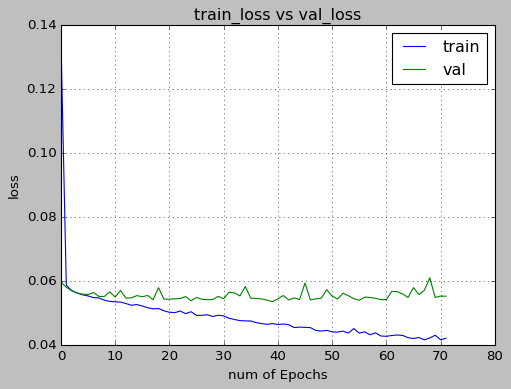

In [178]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_mse=hist.history['mean_squared_error']
val_mse=hist.history['val_mean_squared_error']
xc=range(72)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

Судя по графику где то после 20 эпохи пошло уже переобучение

Перебор параметоров

In [179]:
min(hist.history['val_loss'])

0.05354154109954834

In [180]:
hist.history['val_loss'].index(min(hist.history['val_loss']))

39

In [181]:
'''custom_n_model_list = []
number_of_layers = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]
activ_func_list = ['relu', 'tanh']
units_list = [32, 64, 100, 10, 50, 40, 150, 12, 8, 4]
dropout_list = [0, 0.2, 0.4, 0.6]

for num in number_of_layers:
    layers_ex = []
    layers_ex.append(Dense(units=32, activation='relu', input_dim=features_train.shape[1]))
    for i in range(num):
        layers_ex.append(Dense(units=np.random.choice(units_list), activation=np.random.choice(activ_func_list)))
        layers_ex.append(Dropout(rate=np.random.choice(dropout_list)))
    layers_ex.append(Dense(units=1))
    custom_n_model = Sequential(layers_ex)
    custom_n_model_list.append(custom_n_model)'''
        

"custom_n_model_list = []\nnumber_of_layers = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]\nactiv_func_list = ['relu', 'tanh']\nunits_list = [32, 64, 100, 10, 50, 40, 150, 12, 8, 4]\ndropout_list = [0, 0.2, 0.4, 0.6]\n\nfor num in number_of_layers:\n    layers_ex = []\n    layers_ex.append(Dense(units=32, activation='relu', input_dim=features_train.shape[1]))\n    for i in range(num):\n        layers_ex.append(Dense(units=np.random.choice(units_list), activation=np.random.choice(activ_func_list)))\n        layers_ex.append(Dropout(rate=np.random.choice(dropout_list)))\n    layers_ex.append(Dense(units=1))\n    custom_n_model = Sequential(layers_ex)\n    custom_n_model_list.append(custom_n_model)"

In [182]:
'''model_name_list = []
best_val_loss_list = []
best_epoch_list = []
for model in tqdm(custom_n_model_list):
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics='mean_squared_error')
    hist = model.fit(features_train,
                     target_train, 
                     epochs=100, 
                     batch_size=32, 
                     callbacks=early_stop,
                     validation_data=(features_valid, target_valid),
                     verbose=0)
    model_name_list.append(model.name)
    best_val_loss_list.append(min(hist.history['val_loss']))
    best_epoch_list.append(hist.history['val_loss'].index(min(hist.history['val_loss'])))
    
winsound.MessageBeep()'''

"model_name_list = []\nbest_val_loss_list = []\nbest_epoch_list = []\nfor model in tqdm(custom_n_model_list):\n    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics='mean_squared_error')\n    hist = model.fit(features_train,\n                     target_train, \n                     epochs=100, \n                     batch_size=32, \n                     callbacks=early_stop,\n                     validation_data=(features_valid, target_valid),\n                     verbose=0)\n    model_name_list.append(model.name)\n    best_val_loss_list.append(min(hist.history['val_loss']))\n    best_epoch_list.append(hist.history['val_loss'].index(min(hist.history['val_loss'])))\n    \nwinsound.MessageBeep()"

In [183]:
'''result_df = pd.DataFrame({'model': model_name_list,
                          'best_val_loss': best_val_loss_list,
                          'best_epoch': best_epoch_list})
result_df.sort_values(by='best_val_loss')'''

"result_df = pd.DataFrame({'model': model_name_list,\n                          'best_val_loss': best_val_loss_list,\n                          'best_epoch': best_epoch_list})\nresult_df.sort_values(by='best_val_loss')"

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть подгор гиперпараметров.

Хотя скажу честно - архитектура внутрених слоев (количество слоев, активации, количество нейронов) - это сильно вторично. Если в данных есть значимый сигнал (взаимосвязь) то нейронка её найдет. Нужно просто соблюсти баланс между недообучением/переобучением.
</div>

Загрузим нашу лучшую модель

In [187]:
#best_model = custom_n_model_list[1]

In [186]:
#best_model.summary()

натренируем ее заново с оптимальным количеством эпох

In [102]:
#best_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics='mean_squared_error')

In [185]:
'''hist = best_model.fit(features_train,
                 target_train,
                 epochs=65, 
                 batch_size=32, 
                 callbacks=early_stop,
                 validation_data=(features_valid, target_valid),
                 verbose=2)'''

'hist = best_model.fit(features_train,\n                 target_train,\n                 epochs=65, \n                 batch_size=32, \n                 callbacks=early_stop,\n                 validation_data=(features_valid, target_valid),\n                 verbose=2)'

In [184]:
#y_pred_bestnn = best_model.predict(features_valid)
#mse_bestnn = mean_squared_error(target_valid, y_pred_bestnn, squared=False)

In [105]:
print('Результат линейной регрессии:', mse_lin)
print('Результат лучгей нейронной сети:', mse_bestnn)

Результат линейной регрессии: 0.22741210570972326
Результат лучгей нейронной сети: 0.23186294386107859


Чуть лучше оказалась линейная регрессия, поэтому буду использовать ее

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Я на всякий случай еще раз напоминаю, что закоментировал весь подбор гиппер параметров и буду использовать базовую модель. Тем более, что результат не сильно улучшался.
</div> 

## Тестирование модели

Получим вектор изображений

In [188]:
onlyfiles = [f for f in listdir('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_images/test_images') if isfile(join('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_images/test_images', f))]
img_vectors = []
for name in onlyfiles:
    img = image.load_img('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_images/test_images/'+name, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = resnet50.preprocess_input(x)
    img_features = resnet_model.predict(x, 1)[0]
    img_vectors.append(img_features)
img_vectors_ar = np.array(img_vectors)

1/1 [==============================] - 0s 90ms/step


Альтернативная загрузка векторов изображений

In [189]:
test_gen = ImageDataGenerator()
generator = test_gen.flow_from_directory(directory='C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_images',
                                                   target_size=(224, 224),
                                                   batch_size=1,
                                                   class_mode=None,
                                                   shuffle=False)
features_img_test = resnet_model.predict(generator, 1)

Found 100 images belonging to 1 classes.
100/100 [==============================] - 10s 90ms/step


In [190]:
print(features_img_test.shape)
print(img_vectors_ar.shape)

(100, 2048)
(100, 2048)


Загрузим описания

In [191]:
test_queries = pd.read_csv('C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_queries.csv', sep="|")

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 ОК, тестовые изображения векторизованы </div>

## Теперь напишем функцию, которая будет брать рандомное описание и предоставлять наиболее релевантную картинку.

In [194]:
def take_random_10():
    tets_df = pd.DataFrame(test_queries['query_text'].sample(10)).reset_index(drop=True)
    tets_df['baned'] = tets_df.apply(func_baned_words, axis=1)
    for i in range(len(tets_df['query_text'])):
        print('Поиск картинки по следющему описанию:', tets_df['query_text'][i], '...')
        if tets_df['baned'][i] == 1:
            print('Ваш запрос попадает под законодательные ограничения в связи с использованием изображения детей. Пожалуйста, попробуйте другой запрос')
        else:
            lem_request = tets_df['query_text'][i]
            lem_request = clear_text(lem_request)
            lem_request = lemmatize(lem_request)
            sentence_vectors = []
            vector_request_word_list = lem_request.split()
            for word in vector_request_word_list:
                if word in glove_embedding:
                    sentence_vectors.append(glove_embedding[word])
                else:
                    sentence_vectors.append(np.zeros(50))
            average_embedding_vector = np.mean(sentence_vectors, axis = 0)
            combined_vectors = []
            picture_names = []
            for k in range(len(img_vectors_ar)):
                vector_combined = np.concatenate((average_embedding_vector, img_vectors_ar[k]))
                img_name = generator.filenames[k]
                combined_vectors.append(vector_combined)
                picture_names.append(img_name)
            features = np.array(combined_vectors)
            features = np.array([x.reshape((2098)) for x in features])
            features = normalize(features)
            w_a_predicted = simple_n_model.predict(features)
            index = list(w_a_predicted).index(max(list(w_a_predicted)))
            w_a_chosen = max(list(w_a_predicted))
            print('Мы нашли картинку, которая подойдёт под ваше описание с вероятностью:', w_a_chosen)
            print(picture_names[index])
            img = Image.open("C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_images/"+picture_names[index]).convert('RGB')
            plt.imshow(img)
            plt.show()

Поиск картинки по следющему описанию: A girl is wearing a blue wig under a brown hooded jacket . ...
4/4 [==============================] - 0s 1ms/step
Мы нашли картинку, которая подойдёт под ваше описание с вероятностью: [0.01447083]
test_images\440190907_bf8b7ba8ef.jpg


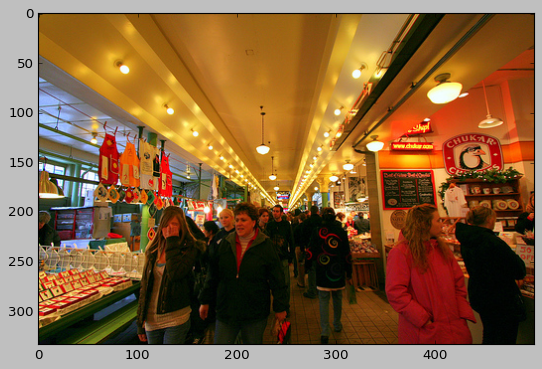

Поиск картинки по следющему описанию: Two women jump in the grass atop a mountain . ...
4/4 [==============================] - 0s 7ms/step
Мы нашли картинку, которая подойдёт под ваше описание с вероятностью: [0.01447443]
test_images\440190907_bf8b7ba8ef.jpg


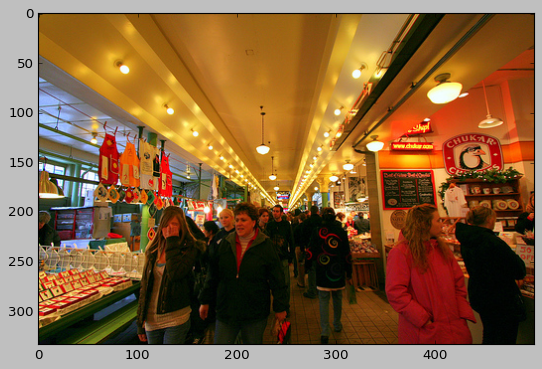

Поиск картинки по следющему описанию: An Arabic man in a white hat . ...
4/4 [==============================] - 0s 3ms/step
Мы нашли картинку, которая подойдёт под ваше описание с вероятностью: [0.01447604]
test_images\440190907_bf8b7ba8ef.jpg


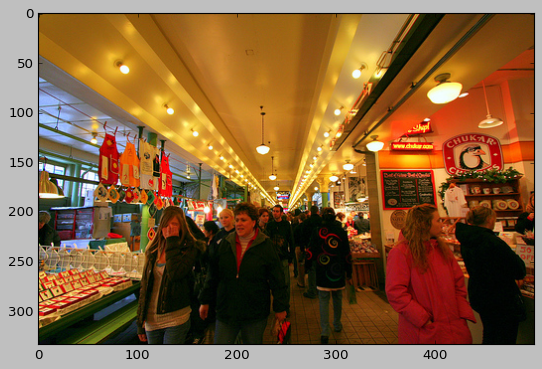

Поиск картинки по следющему описанию: A man on an orange bike jumps in the air with the city line behind him . ...
4/4 [==============================] - 0s 2ms/step
Мы нашли картинку, которая подойдёт под ваше описание с вероятностью: [0.01447744]
test_images\440190907_bf8b7ba8ef.jpg


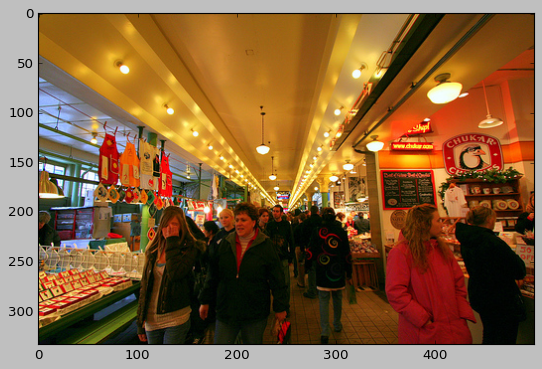

Поиск картинки по следющему описанию: Three little boys , one wearing a cowboy hat look over a fence . ...
Ваш запрос попадает под законодательные ограничения в связи с использованием изображения детей. Пожалуйста, попробуйте другой запрос
Поиск картинки по следющему описанию: a man leans against a large robot . ...
4/4 [==============================] - 0s 0s/step
Мы нашли картинку, которая подойдёт под ваше описание с вероятностью: [0.0144789]
test_images\440190907_bf8b7ba8ef.jpg


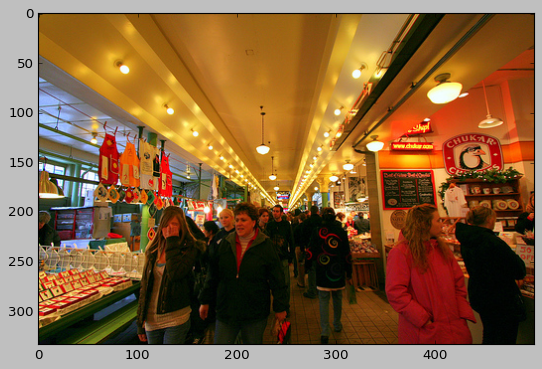

Поиск картинки по следющему описанию: Two teenage girls dressed like hippies walk and talk . ...
4/4 [==============================] - 0s 1ms/step
Мы нашли картинку, которая подойдёт под ваше описание с вероятностью: [0.01442331]
test_images\440190907_bf8b7ba8ef.jpg


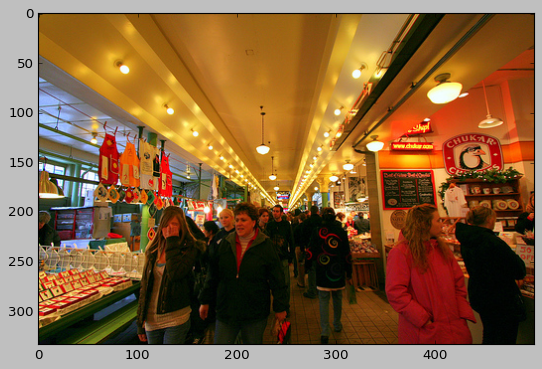

Поиск картинки по следющему описанию: Two small white dogs are in a yard chasing a red ball . ...
4/4 [==============================] - 0s 2ms/step
Мы нашли картинку, которая подойдёт под ваше описание с вероятностью: [0.01447908]
test_images\440190907_bf8b7ba8ef.jpg


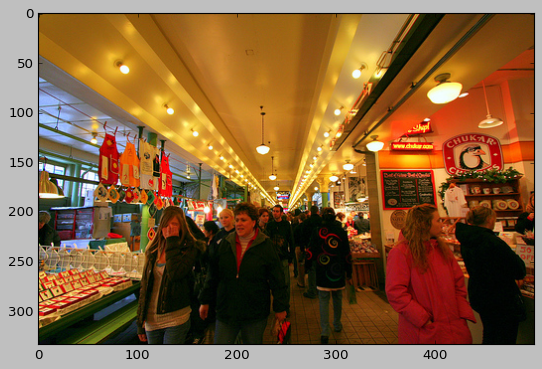

Поиск картинки по следющему описанию: two young girls wearing pink outfits playing on yellow monkey bars . ...
Ваш запрос попадает под законодательные ограничения в связи с использованием изображения детей. Пожалуйста, попробуйте другой запрос
Поиск картинки по следющему описанию: Three men on mountain bikes go over a sand hill . ...
4/4 [==============================] - 0s 3ms/step
Мы нашли картинку, которая подойдёт под ваше описание с вероятностью: [0.01445912]
test_images\440190907_bf8b7ba8ef.jpg


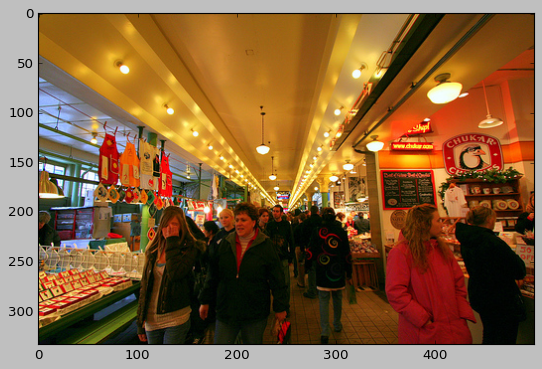

In [195]:
take_random_10()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Модель для инференса готова. Есть соответствие двум главным критериям:

  - принимает текст, возвращает картинку
  - есть дисклеймер
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> К сожалению, не помогло мне то, что я убрал Dense слой
</div> 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Да, к сожалению не работает.... Какие причины? Думаю их несколько. 
    
  - Во первых ты прогнал эмбеддинги изображений через необученный dense слой и тем самым превратил их в шум
  - Слишком мало данных. Нейронная сеть CLIP от Open AI обучалась на сотнях миллионах пар изображение-описание
  - Возможно не самая удачная архитектура - склеивание признаков в один вектор. И в KEras и в Pytorch можно делать сети с несколькими входами. Возмжно стоит через отделный вход пропускать изображение, через отдельный текст и конкатенировть ближе к финальному слою...  Также нужно проводить эксперименты с типом задачи (классификация, регрессия) и с функцией ошибки (losss)
    
    
К сожалению так бывает. Работа ML-разработчика - это не только успехи. Мы проводим много экспериментов и не все они заканчиваются успешно. Мы провели эксперимент, но он не сработал.. Извлекли опыт, пошли дальше.
    
    
Но что-бы нам вернуться к нашему заказчику не с пустыми руками, советую тебе попробовать сделать инференс с помощью модели CLIP и библиотеки sbert. 
    
Вот по этой ссылке ты можешь почитать на русском что это за нейронка такая https://habr.com/ru/post/539312/
    
А вот здесь инструментарий + инструменты позволяющие сделать поиск изображений по описаниям в несколько строк кода  https://www.sbert.net/examples/applications/image-search/README.html    
    
    
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> теперь ниже я попробую вариант с читерский вариант с CLIP)
</div> 

In [199]:
model = SentenceTransformer('clip-ViT-B-32')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [209]:
def take_random_10_with_cheats():
    tets_df = pd.DataFrame(test_queries['query_text'].sample(10)).reset_index(drop=True)
    tets_df['baned'] = tets_df.apply(func_baned_words, axis=1)
    for i in range(len(tets_df['query_text'])):
        print('Поиск картинки по следющему описанию:', tets_df['query_text'][i], '...')
        if tets_df['baned'][i] == 1:
            print('Ваш запрос попадает под законодательные ограничения в связи с использованием изображения детей. Пожалуйста, попробуйте другой запрос')
        else:
            cos_scores = []
            text_emb = model.encode(tets_df['query_text'][i])
            for k in range(len(generator.filenames)):
                img_emb = model.encode(Image.open("C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_images/"+generator.filenames[k]))
                cos_score = util.cos_sim(img_emb, text_emb)
                cos_scores.append(cos_score)
            index = cos_scores.index(max(cos_scores))
            img = Image.open("C:/Users/evgeniy/Desktop/practicum/Сборный проект 4/test_images/"+generator.filenames[index])
            plt.imshow(img)
            plt.show()

Поиск картинки по следющему описанию: Boy flying a distant kite . ...
Ваш запрос попадает под законодательные ограничения в связи с использованием изображения детей. Пожалуйста, попробуйте другой запрос
Поиск картинки по следющему описанию: Middle school aged kids are showing their school spirit at a pep ralley . ...


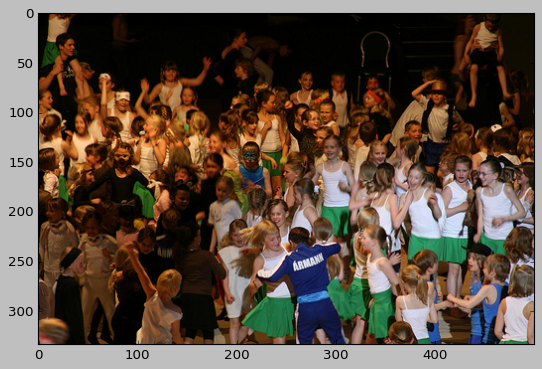

Поиск картинки по следющему описанию: Three little boys standing next to and on a fence . ...
Ваш запрос попадает под законодательные ограничения в связи с использованием изображения детей. Пожалуйста, попробуйте другой запрос
Поиск картинки по следющему описанию: A woman in a red coat takes a picture near marble columns at twilight . ...


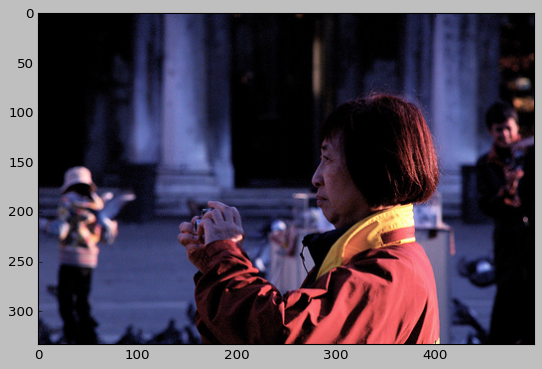

Поиск картинки по следющему описанию: The dog is running . ...


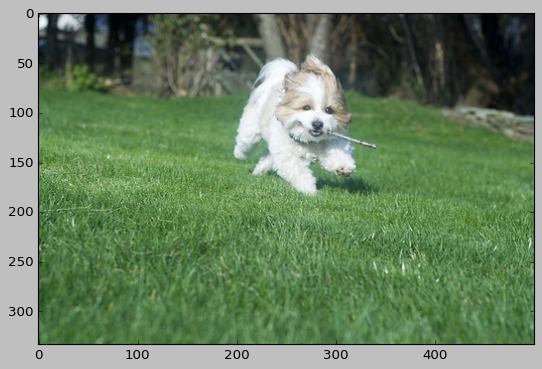

Поиск картинки по следющему описанию: A little girl with purple hat is riding a tricycle along paved road by some farmland . ...
Ваш запрос попадает под законодательные ограничения в связи с использованием изображения детей. Пожалуйста, попробуйте другой запрос
Поиск картинки по следющему описанию: a lone man sitting on a ledge that overlooks the beach ...


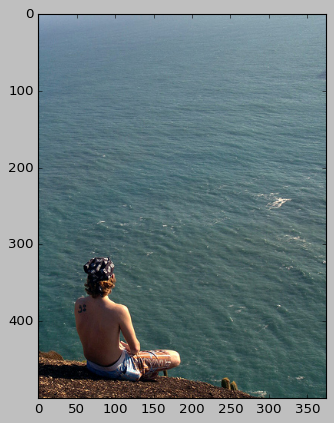

Поиск картинки по следющему описанию: A dog jumping for a tennis ball near an ocean ...


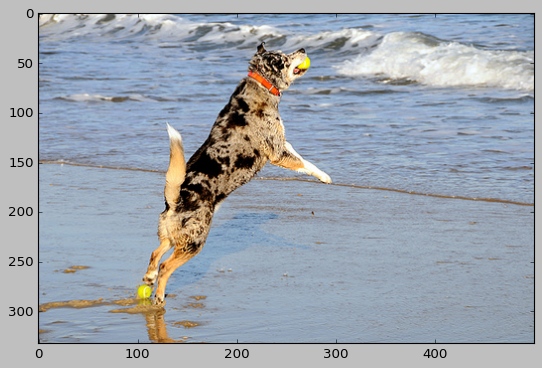

Поиск картинки по следющему описанию: Two dogs are shaking water off . ...


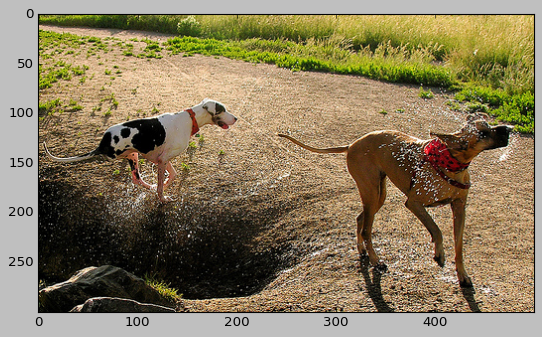

Поиск картинки по следющему описанию: Several female lacrosse players are going after a ball . ...


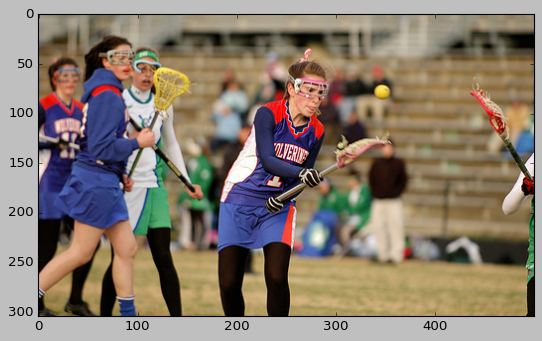

In [211]:
take_random_10_with_cheats()

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Даже несмотря на то, что это читерский подход, все равно выглядит очень круто: настолько хорошо модель подбирает картинки
</div> 

## Вывод

К сожалению не получилось построить модель, которая бы давала релевантные картинки. Я пробывал по-разному загружать изображения, но все равно получается, что модель предстазывает одну и ту же картинку, хоть и с разными вероятностями. Т.е. она реально считает вероятности, просто эта картинка оказывается самой релевантной для абсолютно всех описаний. Буду очень рад понять, где я свернул не туда.

## Новый вывод

Для поиска изображений по описаниям требуются более продвинутые подходы нежели простое соединение 2 векторов текста и изображения. Благодоря тому, что разработчики выкладывают в открытый доступ свои модели, мы можем воспользоваться моделью CLIP и применить ее к нашему проекту. Заказчик может быть доволен.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Да, ты прав, модель работает, но не так как мы бы хотели...  Выше я написал тебе свои мысли по этому поводу👍 </div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом с проектом ты справился: исследованы данные, получены сводные оценки, векторизованы тексты и изображения, объеденены признаки, обучены модели.

Нестандартынй подход с векторизацией текстов с помощью Glove. 
    
Красных комментариев с моей стороны нет. 

Что можно улучшить в пайплайне:
  - Аккуратнее обработать пропуски, заполнить их не нулем, а экспертными оценками
  - Убрать полносвязный слой из модели,готовящей признаки из изображений
    
Но и в этом случае скорее всего качество радикально не улучшится.
    
Поэтому я советую тебе в качестве "вишенки на торте" переписать функцию для инференса с использованием подхода, о котором я писал тебе выше (sbert).
        
    
Жду твой проект на финальное ревью :)
</div>